In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

input_dim = 4
encoding_dim = 2

np.random.seed(42)
W1 = np.random.randn(input_dim, encoding_dim) * 0.1
b1 = np.zeros((1, encoding_dim))
W2 = np.random.randn(encoding_dim, input_dim) * 0.1
b2 = np.zeros((1, input_dim))

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def encode(X):
    return relu(np.dot(X, W1) + b1)

def decode(encoded):
    return sigmoid(np.dot(encoded, W2) + b2)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

learning_rate = 0.05
epochs = 4000

for epoch in range(epochs):
    encoded = encode(X_train)
    decoded = decode(encoded)
    
    loss = mse_loss(X_train, decoded)
    
    error = decoded - X_train
    dW2 = np.dot(encoded.T, error * decoded * (1 - decoded))
    db2 = np.sum(error * decoded * (1 - decoded), axis=0, keepdims=True)
    
    dencoded = np.dot(error * decoded * (1 - decoded), W2.T)
    dencoded[encoded <= 0] = 0
    
    dW1 = np.dot(X_train.T, dencoded)
    db1 = np.sum(dencoded, axis=0, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

Epoch 0, Loss: 1.269900
Epoch 1000, Loss: 0.603175
Epoch 2000, Loss: 0.603257
Epoch 3000, Loss: 0.601235


original_input:
[5.1, 3.5, 1.4, 0.2]

scaled_input:
[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]

encoded_representation:
[4.97397369 9.90772213]

reconstructed_output:
[7.42145818e-05 9.91051649e-01 8.98820394e-05 3.62563141e-06]



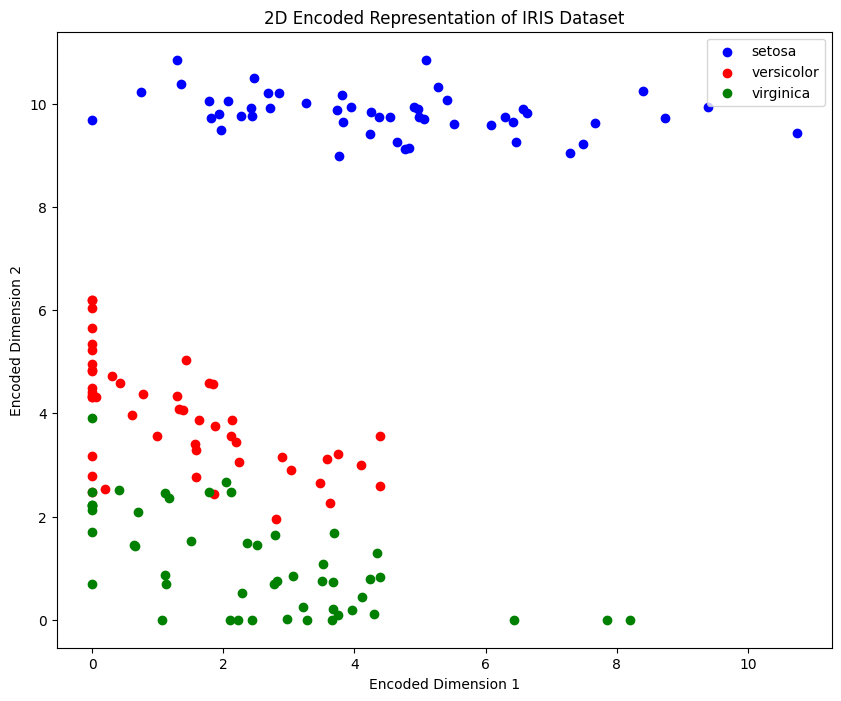

In [11]:
def predict_autoencoder(input_data):
    input_scaled = scaler.transform(np.array(input_data).reshape(1, -1))
    
    encoded = encode(input_scaled)
    
    decoded = decode(encoded)
    
    return {
        "original_input": input_data,
        "scaled_input": input_scaled.flatten(),
        "encoded_representation": encoded.flatten(),
        "reconstructed_output": decoded.flatten()
    }

sample_iris = [5.1, 3.5, 1.4, 0.2]
result = predict_autoencoder(sample_iris)

for key, value in result.items():
    print(f"{key}:")
    print(value)
    print()

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

all_encoded = encode(X_scaled)

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    indices = iris.target == i
    plt.scatter(all_encoded[indices, 0], all_encoded[indices, 1], 
                c=color, label=iris.target_names[i])
plt.legend()
plt.title('2D Encoded Representation of IRIS Dataset')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.show()